# **0. Mount Google drive locally**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Change to the working directory
%cd drive/My\ Drive/Colab\ Notebooks/GraphCMR

/content/drive/My Drive/Colab Notebooks/GraphCMR


# **1. Install instructions**
Project page: https://www.seas.upenn.edu/~nkolot/projects/cmr/.  
GitHub: https://github.com/nkolot/GraphCMR/. 

## **1.1. Check requirements.txt**

Check what we are supposed to install first.

In [3]:
!cat requirements.txt

chumpy==0.67.6
neural-renderer-pytorch==1.1.3
numpy==1.15.4
opencv-python==3.4.4.19
opendr==0.77
scikit-image==0.14.1
scipy==1.2.0
tensorboardX==1.6
torch==1.0.0
torchvision==0.2.1
tqdm==4.19.9


## **1.2. Install amended requirements.txt**

However, to fix the following error, we should install another `chumpy` and `numpy` version. Thus, we will istall the below things instead of the above `requirements.txt`.
```
ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject
```
`opendr` supports only Python 2, so that our runtime type should be Python 2 with GPU.

In [4]:
!pip install chumpy==0.69
!pip install numpy==1.16.1 
!pip install scipy==1.2.0
!pip install opendr==0.77
!pip install tqdm==4.19.9
!pip install scikit-image==0.14.1 
!pip install torch==1.0.0
!pip install torchvision==0.2.1 
!pip install tensorboardX==1.6 
!pip install opencv-python==3.4.4.19
!pip install neural-renderer-pytorch==1.1.3

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for chumpy: filename=chumpy-0.69-cp27-none-any.whl size=58290 sha256=52dc4fc829b57ea34c5ab3b9b888e0bac257add63463298c568e9b0b68ccd593
  Stored in directory: /root/.cache/pip/wheels/df/11/36/2758327d759bad62803f3f9190db1c063e52a0358cecd33e94
Successfully built chumpy
     |████████████████████████████████| 17.0MB 173kB/s 
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.15.0 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


     |████████████████████████████████| 26.6MB 112kB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.2.2
    Uninstalling scipy-1.2.2:
      Successfully uninstalled scipy-1.2.2
     |████████████████████████████████| 245kB 4.6MB/s 
  Created wheel for opendr: filename=opendr-0.77-cp27-cp27mu-linux_x86_64.whl size=6629137 sha256=ff112805bfdd258643501e694d7323952b79873503c18fadb560153d2d2a2c8c
  Stored in directory: /root/.cache/pip/wheels/5c/cd/7c/8f4035d040aacef26bccc11cebfe69cc44871e020b1f5e598b
Successfully built opendr
     |████████████████████████████████| 61kB 3.1MB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm

     |████████████████████████████████| 25.4MB 118kB/s 
  Found existing installation: scikit-image 0.14.3
    Uninstalling scikit-image-0.14.3:
      Successfully uninstalled scikit-image-0.14.3
     |████████████████████████████████| 591.8MB 26kB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.0.0 which is incompatible.
ERROR: torchvision 0.5.0 has requirement torch==1.4.0, but you'll have torch 1.0.0 which is incompatible.
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
     |████████████████████████████████| 61kB 3.1MB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.0.0 which is incompatible.
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0
     |████████████████████████████████| 133kB 4.9MB/s 
     |████████████████████████████████| 25.4MB 116kB/s 
ERROR: fastai 0.7.0 has require

# **2. Fetch data**

The below command will fetch the preprained models.

In [4]:
!sh ./fetch_data.sh

--2020-02-17 08:39:01--  https://seas.upenn.edu/~nkolot/data/cmr/models.tar
Resolving seas.upenn.edu (seas.upenn.edu)... 158.130.68.91
Connecting to seas.upenn.edu (seas.upenn.edu)|158.130.68.91|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.seas.upenn.edu/~nkolot/data/cmr/models.tar [following]
--2020-02-17 08:39:02--  https://www.seas.upenn.edu/~nkolot/data/cmr/models.tar
Resolving www.seas.upenn.edu (www.seas.upenn.edu)... 158.130.68.91, 2607:f470:8:64:5ea5::9
Connecting to www.seas.upenn.edu (www.seas.upenn.edu)|158.130.68.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 342036480 (326M) [application/x-tar]
Saving to: ‘data/models.tar’

models.tar          100%[===================>] 326.19M  4.62MB/s    in 69s     

2020-02-17 08:40:12 (4.71 MB/s) - ‘data/models.tar’ saved [342036480/342036480]

models/
models/model_checkpoint_h36m_up3d.pt
models/model_config.json
models/model_checkpoint_h36m_up3d_e

# **3. Run demo code**

The below image is the default image.

Populating the interactive namespace from numpy and matplotlib


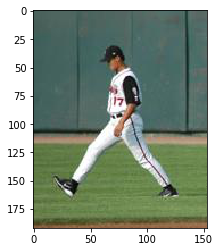

In [12]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('examples/im1010.jpg')
imgplot = plt.imshow(img)
plt.show()

## **3.1. Run default demo code**

For more results, please check here: https://github.com/syenpark/GraphCMR/blob/master/examples/

In [11]:
!python demo.py --checkpoint=data/models/model_checkpoint_h36m_up3d_extra2d.pt --img=examples/im1010.jpg

/content/drive/My Drive/Colab Notebooks/GraphCMR/utils/mesh.py:38: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  adjmat[i,i] = 1


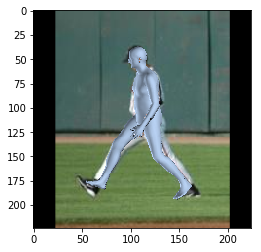

In [13]:
img = mpimg.imread('examples/im1010_smpl.png')
imgplot = plt.imshow(img)
plt.show()